<a href="https://colab.research.google.com/github/vagmin27/DeepLearning/blob/main/tSNE(DataVisualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u><b>Data Visualization : t-SNE (t-distributed Stochastic Neighborhood Embedding) </b></u></h1>

</center>

# **Properties-**

*   <h2>Generates low dimensional representation of the high dimensional data
*   <h2>Preseves only local similairties.
*   <h2>Unsupervised non-linear dimensionality reduction technique


<center>

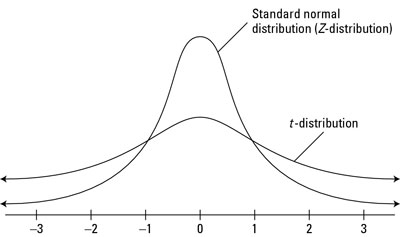

</center>



*   <h2>Bell shaped and Symmetric
*   <h2>Heavier Tails than Gaussian Distributions - Tends to produce values that fall far from its mean.

<h2><b>Note</b> : $t-$distribution ensures that all the clusters would not mix up in the middle and which will be difficult to visualize.



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [2]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])
# Download the MNIST Dataset
train_set = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
train_loader = torch.utils.data.DataLoader(dataset = train_set,
                                     batch_size = 32,
                                     shuffle = True)

# for testing
test_set = datasets.MNIST(root = "./data",
                         train = False,
                         download = True,
                         transform = tensor_transform)

test_loader = torch.utils.data.DataLoader(dataset = test_set,
                                     batch_size = 32,
                                     shuffle = True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 54.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.83MB/s]


In [3]:
print("Number of samples for training = ", len(train_set))
print("Number of samples for testing = ", len(test_set))

Number of samples for training =  60000
Number of samples for testing =  10000


In [4]:
samples_per_class = 200
num_classes = 10

# total number of samples
num_samples = samples_per_class * num_classes

# stores images from all class labels
images = torch.zeros(num_classes, samples_per_class, 28*28)
# print(images.shape)

# counter checks whether number of samples of a class is not exceeded its count
counter = [0 for i in range(10)]

# collecting images from the teain set
for i in range(num_samples):

  # print(train_set[i][0].shape, "  ", train_set[i][1])
  l = train_set[i][1]

  if counter[l] < samples_per_class:

    images[int(l)][counter[l]] = train_set[i][0].reshape(28*28)
    counter[l] += 1

  if len(counter) == num_samples:
    break




In [5]:
images = images.reshape(2000, 784)
images.shape

torch.Size([2000, 784])

# **Applying t-SNE algorthim**



In [6]:
# embedding into 2-D space
# n_components = > dimension in which the points will be embedded
# random_state => reproduces the output through the whole program

model_tsne = TSNE(n_components = 2, random_state = 30)

# applying the model on the input and you will get the desired embedding
embed_x = model_tsne.fit_transform(images)

In [8]:
print("Shape of embedded features = ", embed_x.shape)

Shape of embedded features =  (2000, 2)


<h1><b> t-SNE visualization on MNIST Dataset

In [ ]:
# generatinh custom colors for different class labels
colors = cm.rainbow(np.linspace(0, 1, 10))
# print(colors)

# fixing figure size
plt.figure(figsize=(15, 10))

for c in range(num_classes):

  plt.scatter(embed_x[samples_per_class * c:samples_per_class * (c+1), 0],
              embed_x[samples_per_class * c:samples_per_class * (c+1), 1],
              s = 100,
              color = colors[c],
              label = c)

cbar = plt.colorbar(orientation = 'vertical')

# # setting color bar title
cbar.set_label(label = "Concentrations", size = 50)

# cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# cbar.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# providing title of the plot
plt.title("t-SNE visualizations on MNIST dataset", fontsize = 30)

plt.legend()
plt.show()
